# Cosmological Parameter Estimation Lecture 1 Exercise


# Running These Exercises

### MyBinder
You can run these exercises by visting https://mybinder.org/v2/gh/joezuntz/michigan/master but your work will not automatically be saved at the end 
of each session.

**To save your work:**
- In the menu under the Jupyter logo at the top left of the page, select File > Download as > Notebook.  This will save your work to your machine.

**To restore your work:**
- Visit https://mybinder.org/v2/gh/joezuntz/michigan/master again
- Click "Upload"
- Find the file you downloaded and select it
- Click the upload button that appears, and overwrite the existing file.

### Local Jupyter

You can also clone this repository from `git clone https://github.com/joezuntz/michigan` and run it locally if you already know how to do that.

***
# Preamble

You can run each cell by highlighting it and pressing Shift-Enter.

We will first do some setup that lets us make plots inline in the notebook - run this next cell.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import camb

***
# Lecture 1: Essential Data Handling & Modelling

## Exercise 1: Astropy

There are many public cosmology libraries that have been released to help calculate theory predictions or explore data.

One of these is Astropy, a python library for astronomy research.  It contains tools for many common astronomy tasks, including basic (background) cosmology.

In this first exercise we will explore how to create a cosmological model using Astropy, and use it to predict some observable values.

In [2]:
from astropy.cosmology import LambdaCDM

When you execute the cell below some documentation will pop up at the bottom.
Read it and learn how to create a new Lambda CDM cosmology model with specified parameters.

HINT: Some parameters are optional.

In [3]:
LambdaCDM?

Now, create a test model called `cosmo` with Hubble parameter 72.0, matter density 0.3, dark energy density 0.7

In [4]:
# Write your code here
cosmo = LambdaCDM(H0=72., Om0=0.3, Ode0=0.7)

Your `cosmo` object has functions attached to it ("methods") that calculate different cosmological quantities.
Run the cell below and scroll down in the cell to find a listing of them.

Find the method `distmod` and read about its meaning.

In [5]:
help(cosmo)

Help on LambdaCDM in module astropy.cosmology.core object:

class LambdaCDM(FLRW)
 |  LambdaCDM(H0, Om0, Ode0, Tcmb0=0, Neff=3.04, m_nu=<Quantity 0. eV>, Ob0=None, name=None)
 |  
 |  FLRW cosmology with a cosmological constant and curvature.
 |  
 |  This has no additional attributes beyond those of FLRW.
 |  
 |  Parameters
 |  ----------
 |  
 |  H0 : float or `~astropy.units.Quantity`
 |      Hubble constant at z = 0.  If a float, must be in [km/sec/Mpc]
 |  
 |  Om0 : float
 |      Omega matter: density of non-relativistic matter in units of the
 |      critical density at z=0.
 |  
 |  Ode0 : float
 |      Omega dark energy: density of the cosmological constant in units of
 |      the critical density at z=0.
 |  
 |  Tcmb0 : float or scalar `~astropy.units.Quantity`, optional
 |      Temperature of the CMB z=0. If a float, must be in [K].
 |      Default: 0 [K]. Setting this to zero will turn off both photons
 |      and neutrinos (even massive ones).
 |  
 |  Neff : float, opti

First, use `cosmo.distmod` to work out the distance modulus at the single redshift value $z=1$.

In [6]:
# Write your code here
cosmo.distmod(1.0)

<Quantity 44.03906537 mag>

Now, create a numpy array of redshifts `z` = 0.1, 0.2, 0.3, ... 1.6 using numpy, and compute the distance modulus to it.
Make a plot of distance modulus versus redshift in this model.

Text(0.5, 0, 'mu')

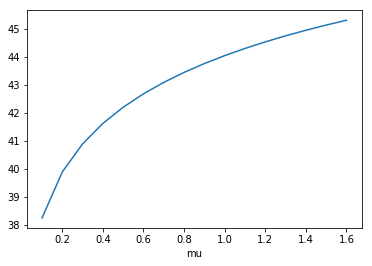

In [7]:
# Write your code here
z = np.arange(0.1, 1.7, 0.1)
mu = cosmo.distmod(z)
plt.plot(z, mu)
plt.xlabel("z")
plt.xlabel("mu")

Now let's assume that the absolute magnitude of our supernovae is `M0 = -19.3` magnitudes

Use the `distmod` method to calculate the apparent magnitude $m$ of these supernovae, as a function of redshift.

Make a plot of $m$ vs $z$.

HINT: Re-read the help on `distmod` for the relation between apparent and absolute magnitude.  Distmod returns values with units; to remove the units from a quantity `x` you can write `x = x.value`.

Text(0, 0.5, 'm')

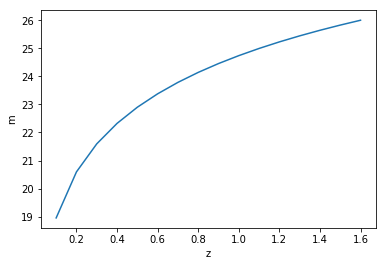

In [8]:
# write your code here
# m = M + mu
M = -19.3
m = M + mu.value
plt.plot(z, m)
plt.xlabel("z")
plt.ylabel("m")

As the final step in this exercise, write a `model` function to predict the apparent magnitude for any set of parameters, for any set of redshifts.
We will use this tomorrow!

In [9]:
# Complete this function
def model(H0, Omega_matter, Omega_lambda, M0, z):
    cosmo = LambdaCDM(H0=H0, Om0=Omega_matter, Ode0=Omega_lambda)
    mu = cosmo.distmod(z)
    m = mu.value + M0
    return m

# Exercise 2: CAMB



CAMB, the Code for Anisotropies for the Microwave Background, is Boltzmann code:  it integrates the Boltzmann equation, $df/dt = C[f]$, which describes how collisional processes affect densities, momenta, and higher order moments of the distribution of light, matter, and other cosmic components like neutrinos.

First, create an array or redshift values from 0 .. 2 with spacing 0.1, at which CAMB will evaluate the matter power spectrum.

HINT: `np.arange`

In [10]:
# Complete this code:

redshifts = np.arange(0., 2., 0.1)

We will use the following parameters to CAMB, which describe the cosmology and tell it that we want the late Universe power spectrum, which is calculated from the transfer functions.  Fill in the `...` below to use all these and your `redshifts` variable from above as named arguments to `camb.set_params`, which will create the settings CAMB needs.

$\Omega_c h^2 = 0.1193$

$\Omega_b h^2 = 0.02242$

$\Omega_k = 0.0$

$H_0 = 67.66$

HINT: Have a look at the camb documentation on https://camb.readthedocs.io/en/latest/model.html for parameter names

In [11]:
# Complete this code:

p = camb.set_params(redshifts=redshifts, WantTransfer = True, omch2=0.1193, ombh2=0.022442, omk=0., H0=67.66)

Note: redshifts have been re-sorted (earliest first)


Run CAMB as described in the lecture using your settings `p`.

In [12]:
# Complete this code
results = camb.get_results(p)

CAMB can generate an interpolator for the matter power, an object which stores $P(k, z)$ evaluated at grid points in $k$ and $z$, and knows how to interpolate between them to other values.

Run the following cell to get a list of all the attributes on the results that start with `get_`.  Find the one that will compute this estimator

In [13]:
# Run this cell
for d in dir(results):
    if d.startswith('get_'):
        print(d)

get_BAO
get_Omega
get_all_fields
get_background_densities
get_background_outputs
get_background_redshift_evolution
get_background_time_evolution
get_cmb_correlation_functions
get_cmb_power_spectra
get_cmb_transfer_data
get_cmb_unlensed_scalar_array_dict
get_dark_energy_rho_w
get_derived_params
get_fsigma8
get_lens_potential_cls
get_lensed_gradient_cls
get_lensed_scalar_cls
get_linear_matter_power_spectrum
get_matter_power_interpolator
get_matter_power_spectrum
get_matter_transfer_data
get_nonlinear_matter_power_spectrum
get_redshift_evolution
get_sigma8
get_sigma8_0
get_sigmaR
get_source_cls_dict
get_tensor_cls
get_time_evolution
get_total_cls
get_unlensed_scalar_array_cls
get_unlensed_scalar_cls
get_unlensed_total_cls


and call it to create an interpolator.  It takes no arguments.

In [14]:
# Complete this code
P = results.get_matter_power_interpolator()

Use your interpolator to plot P(k) at varying redshift values 0, 0.1, and 0.2, using the method `P.P(z, k)`.
For `k`, use log-spaced values from $10^{-3}$ to $10^{0}$

HINT: use np.logspace for the k values.

What are the units of these quantities?

Text(0, 0.5, 'P(k) / (Mpc/h)^3')

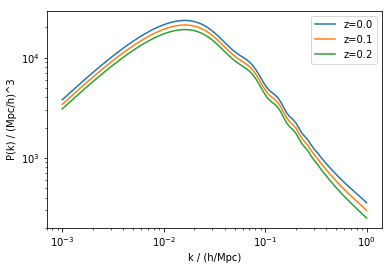

In [15]:
# Write your code here
k = np.logspace(-3, 0, 100)
for z in [0.0, 0.1, 0.2]:
    p = P.P(z, k)
    plt.loglog(k, p, label=f'z={z}')
plt.legend()
plt.xlabel("k / (h/Mpc)")
plt.ylabel("P(k) / (Mpc/h)^3")

### More Activities

If you complete the activities above, try one of these activities:
- Plot some other CAMB outputs, like the CMB power spectra
- Compare the angular diameter distance calculated by CAMB and by Astropy.  They should agree to 10^{-6} if all the parameters are the same.  Beware of neutrinos!
- Dragan described the $\sigma_8$ parameter, an integral over P(k).  Calculate it, and compare it to the camb internal version